In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
if not os.path.exists('data'):
    new_directory_path = "..\\..\\"
    os.chdir(new_directory_path)
    
from src.data.datasets import FreeViewInMemory
from src.data.transforms import AddRandomCenterCorrelatedRadialNoise, SaveCleanX

In [8]:
noise = AddRandomCenterCorrelatedRadialNoise(
    initial_center = [320//2,512//2],
    ptoa = 1/16,
    radial_corr = 0.5,
    radial_avg_norm = 4.13,
    radial_std = 5.5,
    center_noise_std = 50,
    center_corr = 0.9,
    center_delta_norm = 200,
    center_delta_r = 0.2,
)

save = SaveCleanX()

In [9]:
data = FreeViewInMemory(transforms=[save,noise])

In [13]:
idx = np.random.randint(0,len(data),1)
item = data[idx[0]]

In [15]:
x = item['x']
clean_x = item['clean_x']

In [31]:
steps = 10
betas = np.linspace(1e-4, 0.02, steps)
alphas = 1.0 - betas
cum_alpha = np.cumprod(alphas)

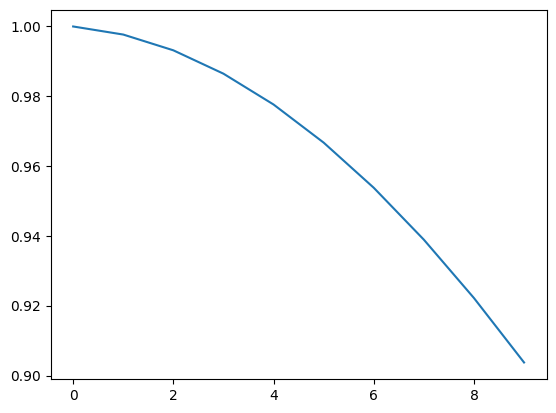

In [32]:
plt.plot(cum_alpha)

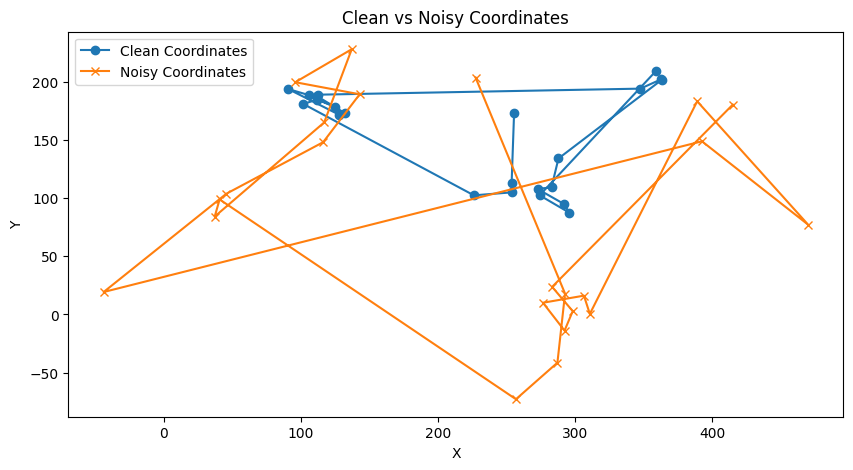

In [ ]:
# shape (coords, items)
coords = x[:2]
clean_coords = clean_x[:2]
noise = coords - clean_coords
plt.figure(figsize=(10, 5))
plt.plot(clean_coords[0], clean_coords[1], label='Clean Coordinates', marker='o')
plt.plot(coords[0], coords[1], label='Noisy Coordinates', marker='x')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clean vs Noisy Coordinates')
plt.show()